In [92]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import os

In [93]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.set_logical_device_configuration(gpus[0], [tf.config.LogicalDeviceConfiguration(memory_limit=4096)])
        print("complete GPU memory limit setting.")
    except RuntimeError as e:
        print(e)

complete GPU memory limit setting.


In [94]:
BATCH_SIZE = 64
TRAIN_PATH = "cifar/train"
TEST_PATH = "cifar/test"

In [95]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
)

test_datagen = ImageDataGenerator(
    rescale=1.0/255.0
)

train_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(32, 32),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(32, 32),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    TEST_PATH,
    target_size=(32, 32),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    shuffle=False
)

model = Sequential([
    Conv2D(48, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(96, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(192, (3, 3), activation='relu', padding='same'),
    Conv2D(192, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax') 
])
model.summary()

Found 40000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_55 (Conv2D)          (None, 30, 30, 48)        1344      
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 15, 15, 48)       0         
 g2D)                                                            
                                                                 
 conv2d_56 (Conv2D)          (None, 15, 15, 96)        41568     
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 7, 7, 96)         0         
 g2D)                                                            
                                                                 
 conv2d_57 (Conv2D)          (None, 7, 7, 192)       

In [96]:
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    verbose=1
)

Epoch 1/10
625/625 [==============================] - 38s 60ms/step - loss: 1.8318 - accuracy: 0.3145 - val_loss: 2.5960 - val_accuracy: 0.1322
Epoch 2/10
625/625 [==============================] - 37s 60ms/step - loss: 1.6018 - accuracy: 0.4121 - val_loss: 1.7056 - val_accuracy: 0.3692
Epoch 3/10
625/625 [==============================] - 36s 58ms/step - loss: 1.5049 - accuracy: 0.4542 - val_loss: 1.6452 - val_accuracy: 0.4248
Epoch 4/10
625/625 [==============================] - 36s 58ms/step - loss: 1.4438 - accuracy: 0.4801 - val_loss: 1.5466 - val_accuracy: 0.4457
Epoch 5/10
625/625 [==============================] - 36s 57ms/step - loss: 1.3928 - accuracy: 0.5014 - val_loss: 1.5162 - val_accuracy: 0.4568
Epoch 6/10
625/625 [==============================] - 36s 57ms/step - loss: 1.3532 - accuracy: 0.5186 - val_loss: 1.6367 - val_accuracy: 0.4098
Epoch 7/10
625/625 [==============================] - 36s 58ms/step - loss: 1.3264 - accuracy: 0.5253 - val_loss: 1.3707 - val_accuracy:

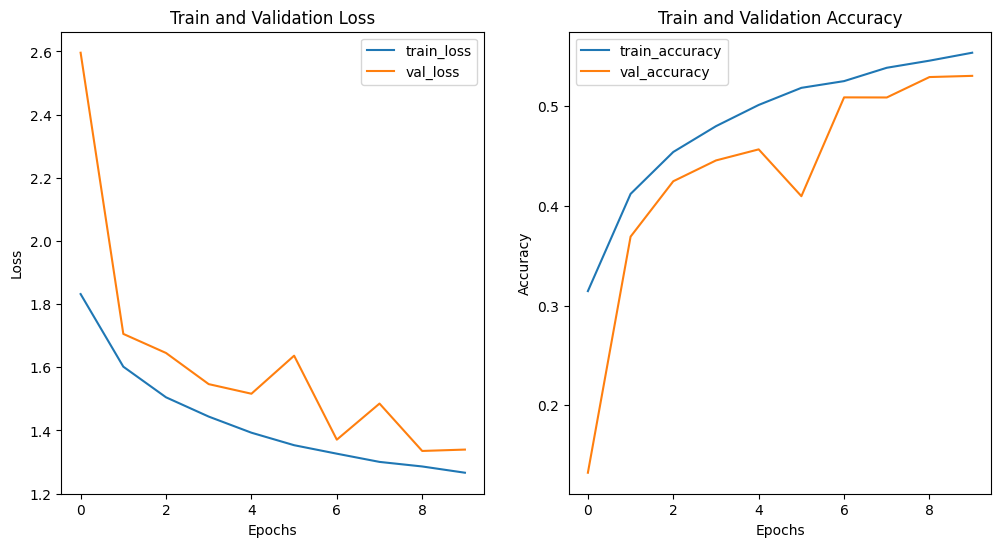

157/157 [==============================] - 4s 22ms/step - loss: 1.2564 - accuracy: 0.5499
Test Accuracy: 0.5499


In [98]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Train and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Train and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.4f}")